# Analizado los crímenes en la Ciudad de Nueva York

__Integrantes:__ 
- Daniel Flores
- Francisco Fernandez

Sección G1


## Preliminares

### Objetivo

El objetivo del problema es generar dos modelos predictivos relacionados con los stop-and-frisk (detenciones y cateos) realizadas por la policía de NYC (NYPD).

El primer modelo debe predecir si un determinado procedimiento terminará en arresto o no en base a las características medidas del sospechoso: género, raza y que se arrestado en uno de los cincos barrios.

El segundo modelo debe predecir si el procedimiento finalizará en una acción violenta.

### Contexto

Cada vez que un policía detiene a una persona en NYC, el oficial debe completar un formulario registrando los detalles de la detención. Los formularios eran llenados a mano hasta el año 2017, cuando los formularios en papel se conviertieron a electrónicos. La policía informa las detenciones y cateos de dos maneras: un informe resumido publicado trimestralmente y una base de datos completa publicada anualmente.

Los informes trimestrasles son publicados cada tres meses, incluyen información de detenciones, arrestos y citaciones. Los datos son desglosados por distrito policial, raza y genero de la persona detenida.

La base de datos anual incluye practicamente toda la información registrada por el oficial de policía después de una detención, tal como la edad, si la persona fue cateada, si tenía un arma o si se recuperó un arma de fuego, si se usó fuerza física en la detención, y la ubicación exacta de la detenciín dentro del distrito policial. La NYPD sube esta base de datos a su página web anualmente. La base de datos contiene más de 100 variables y dependiendo del año, sobre 10.000 observaciones, cada registro representa una detención realizada por un oficial de policía.

**Controversia**

Los procedimientos stop-and-frisk han sido muy criticado debido su alto porcentaje de detenciones de personas inocentes --sobre 80% entre 2002 y 2015-- y a que la mayoría de las detenciones recaen en personas de raza negra y latinos, lo mismo sucede con el uso de la fuerza.

Resumen de datos del año 2009:
- 581.168 procedimientos registrados.
- 510.742 eran inocentes (88%).
- 310.611 eran de raza negra (55%).
- 180.055 eran latinos (32%).
- 53.601 eran blancos (10%).
- 289,602 tenían entre 14-24 años (50%).

Desde el año 2011 hubo una reducción constante de los procedimientos registrados, disminuyendo el porcentaje de inocentes detenidos, pero se mantuvo la parcialidad hacia las razas negras y latinas:

Resumen de dartos del año 2018:
- 11.008 procedimientos registrados. 
- 7.645 eran inocentes (70%).
- 6,241 eran de raza negra (57%).
- 3,389 eran latinos (31%).
- 1,074 eran blancos (10%).

Fuente: según [STOP-AND-FRISK DATA](https://www.nyclu.org/en/stop-and-frisk-data)

Según el estudio [An Analysis of the New York City Police Department’s “Stop-and-Frisk” Policy in the Context of Claims of Racial Bias](http://www.stat.columbia.edu/~gelman/research/published/frisk9.pdf) **Pendiente hablar de estudio**

**Se debe tener en cuenta, a priori, que existirá una parcialidad racial en la data de entrenamiento y posterior evaluación**.

### Desarrollo de la solución

Se seguirá el flujo habitual de machine learning:

1. **Importación/obtención de datos.**
2. **Análisis de datos:** Se analizarán los datos pérdidos y outliers, se generarán tendencias y estadística descriptiva de los atributos y vectores objetivos. Se presentará el esquema de recodificación en caso de requerirse.
3. **Preprocesamiento:** Se transformarán (recodificarán) y limpiarán datos. Se normalizarán los atributos. 
4. **Búsqueda y selección de algoritmos a ocupar en base a objetivos del modelo.** En esta sección en base al conocimiento previo y a búsqueda de problemas similares se seleccionarán los algoritmos a utilizar para los modelos. Selección de métricas para modelos.
5. **Entrenar y validación del modelo:** 
Se dividirán los datos en grupos: Entrenamiento, validación y **prueba PENDIENTE NOMBRE**. Se entrenarán y compararán los modelos utilizando los algoritmos seleccionados del item anterior en un GridSearch con la métrica previamente seleccionada. Los modelos tendrán hyperparámetros básicos.
Se seleccionará el modelo con mejor métrica y se ajustarán sus hyperparámetros utilizando los datos de validación.
Podría ser necesario recodificar datos.
6. **Evaluación del modelo**
Finalmente se evaluará el modelo seleccionado para cada problema, obteniéndo sus métricas, y finalmente se serializará.

### Métricas

#### Predicción de arresto de sospechoso

A partir de las estadísticas presentadas en el item "Controversia", se nota:

1. Es importante disminuir el porcentaje de inocentes incluídos en los procedimientos.
2. Es bien visto que la policía disminuya la cantidad de procedimientos.
3. Los procedimientos son criticados por la parcialidad que tiene la policía al llevarlos a cabo.
4. Según los datos de [STOP-AND-FRISK DATA](https://www.nyclu.org/en/stop-and-frisk-data) cuando la policía disminuyó la cantidad de procedimientos, se logró disminuir la cantidad de inocentes.

Por lo tanto se tomará como métrica principal la presición (**pendiente ver accuracy**) en arrestos, esto asume que si un arresto fue realizado, se debió a que el sospechoso no era inocente.

Como métrica secundaria (debido a que la prueba solicita dos métricas), será el f1-score evaluado cuando se produce el arresto.

#### Predicción de uso de fuerza

**Pendiente**

### Algoritmos a utilizar

**Pendiente**

## Aspectos computacionales

Se utilizara las principales librerias para el analisis de datos, las cuales son:

### Bibliotecas de Python 
 
- `pandas`:  Permite realizar tareas de manipulación, agregación y visualización de datos de forma más sencilla.
- `numpy`: Agrega soporte para vectores y matrices y  funciones matemáticas de alto nivel para operar con esos datos. 
- `matplotlib`: Permite crear visualizaciones de datos simples.
- `seaborn`: Permite visualizar modelos estadísticos. Se basa en Matplotlib.
- `statsmodels`: Estimación de modelos estadísticos, en nuestro caso la regresion logística.
- `scikit-learn`: Implementa aprendizaje de máquina, incluye varios algoritmos de clasificación, regresión y métricas, incluyendo varias herramientas útiles, como separación de datos de entrenamiento, validación cruzada y codificación de variables categóricas.
- `factor_analizer`: Permite implementar el EFA (análisis factorial exploratorio).
- `missingno`: Biblioteca para la visualización de datos perdidos.
- `warnings`: Evitará que aparezcan las advertencias de avisos de deprecación.
- `IPython.display`: Embellece el output de salida. 


### Módulos y funciones de Python

- `utils`: Módulo que contiene función para graficar
- `preproc_nyc_sqf`: Modulo con funciones básicas de limpieza de datos faltantes, transformación de etiquetas
nulas en variables categóricas y crea atributos sinteticos de edad del sospechoso y conversión de distancia a sistema metrico.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import cross_validate

import missingno as msngo
import warnings

from IPython.display import display, Markdown

from utils import get_graph, get_graph_2D
from preproc_nyc_sqf import create_suitable_dataframe

pd.set_option("display.max_rows", 112)
pd.set_option("display.max_info_columns", 112)
pd.set_option("display.max_colwidth", 3000)

warnings.filterwarnings('ignore')

## Análisis exploratorio

### Base de datos
 
La base de datos es del año 2009, contiene sólo el 1% de los datos, la base de datos original tiene 111 columnas y 5812 observaciones. 

In [3]:
df = pd.read_csv("2009_1perc.csv", index_col=0)
display(Markdown("**Base de datos original**: Tiene {} columnas y {} ".format(df.shape[1], df.shape[0])))

# Importa descripción de variables
df_spec = pd.read_csv("2009 SQF File Spec.csv", sep=";")
df_spec.set_index("Variable", inplace=True)
df_spec.loc[:, ["Label"]].head(df_spec.shape[0]).sort_index(axis="index")

display(Markdown("**Algunas observaciones de la base de datos original**"))
df.sample(10,random_state=1314).T

**Base de datos original**: Tiene 111 columnas y 5812 

**Algunas observaciones de la base de datos original**

,214992,369536,359220,80868,464343,77809,472925,113973,403045,253929
year,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009
pct,24,106,43,102,47,42,81,73,34,115
ser_num,1055,5048,5919,941,5231,1099,7425,5795,4467,5982
datestop,4242009,8072009,7312009,2112009,10062009,2102009,10112009,2272009,8282009,5182009
timestop,1937,100,5,1858,2136,1655,1840,1838,2000,1340
recstat,1,A,1,A,1,A,1,A,A,A
inout,I,O,O,O,I,O,I,O,O,O
trhsloc,T,P,H,P,H,P,H,P,P,P
perobs,5,2,1,1,2,2,1,1,1,1
crimsusp,ROBBERY,FELONY-GRAND LARCENY,FEL,BURG,MISD,FELONY/ CPCS,MISD,CPW,MISDEMEANOR,PETTI LARCENY


### Datos pérdidos

El primer gráfico muestra cómo se distribuyen los valores pérdidos en la data. El segundo gráfico muestra el porcentaje de datos de valores no nulos (no pérdidos). En ambos casos se seleccionaron sólo las variables con datos pérdidos.

<Figure size 432x288 with 0 Axes>

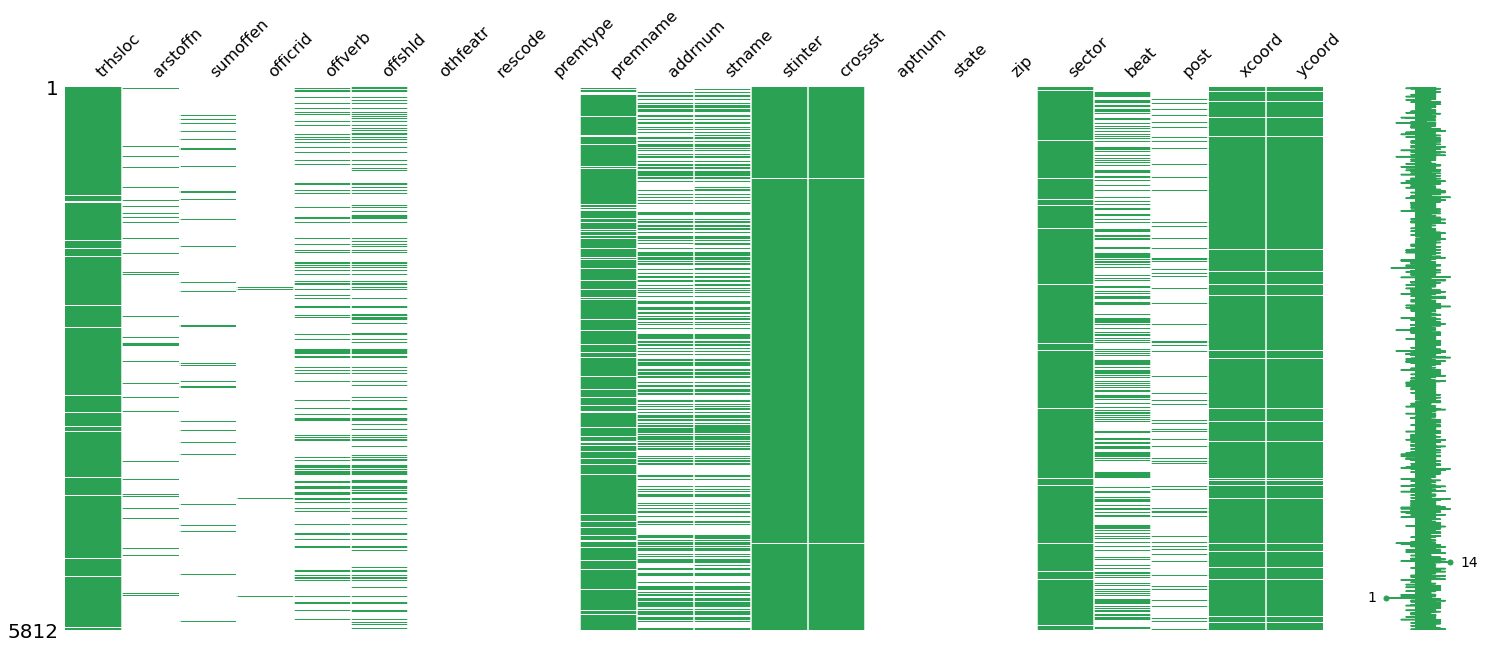

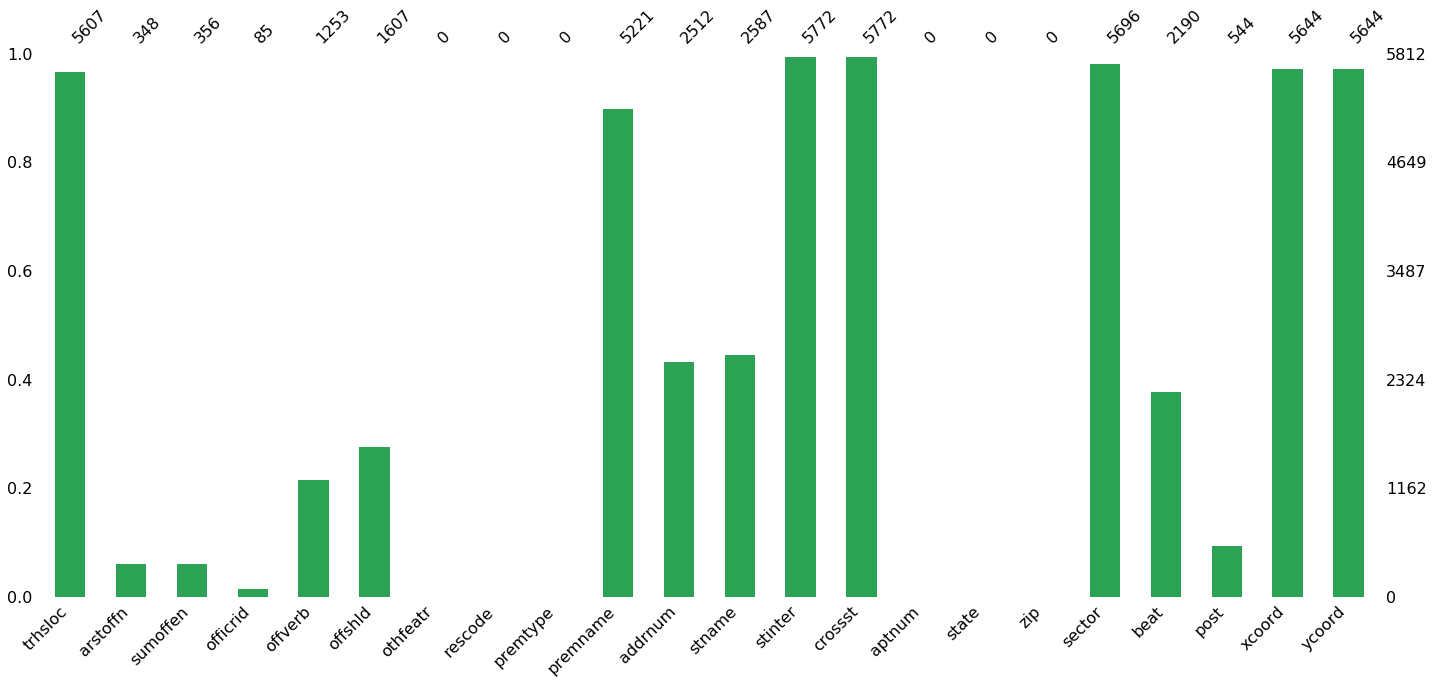

In [9]:
# Aplica trim a datos del tipo object (string) y los reemplaza
# por null

df_missing = df.copy()

df_obj = df_missing.select_dtypes(['object'])
df_missing[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
df_missing = df_missing.replace(to_replace="", value=np.nan)

# Filtra las n columnas con mayor cantidad de datos pérdidas
filtered_data = msngo.nullity_filter(
    df_missing, filter='bottom', n=40, p=0.999
)

color = (0.171, 0.637, 0.328)
#color = (0.629, 0.848, 0.606)

plt.figure()
msngo.matrix(filtered_data, color=color)

plt.figure()
msngo.bar(filtered_data, color=color)

Todas las columnas con un alto porcentaje de datos pérdidos serán eliminadas. Se considerará un valor alto que sólo contenga menos de un 60% de datos. 

El resto de valores pérdidos son bajos con respecto al total de datos (<5% por columna, sólo 7 variables). Por lo que se eliminarán las filas completas.

### Análisis univariado

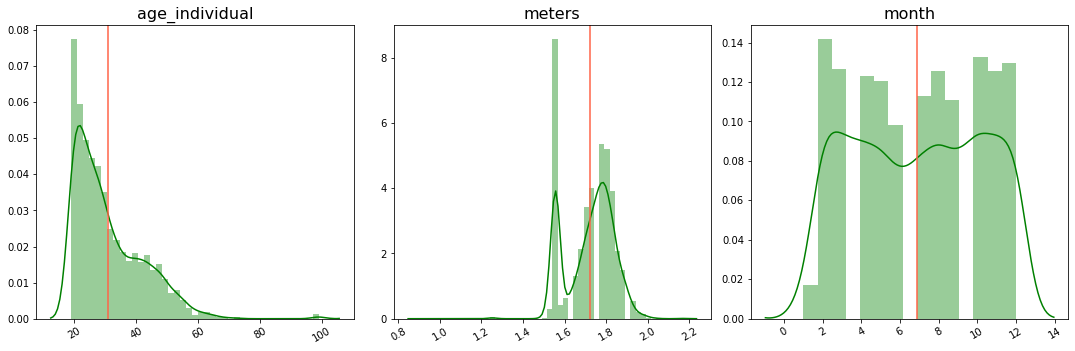

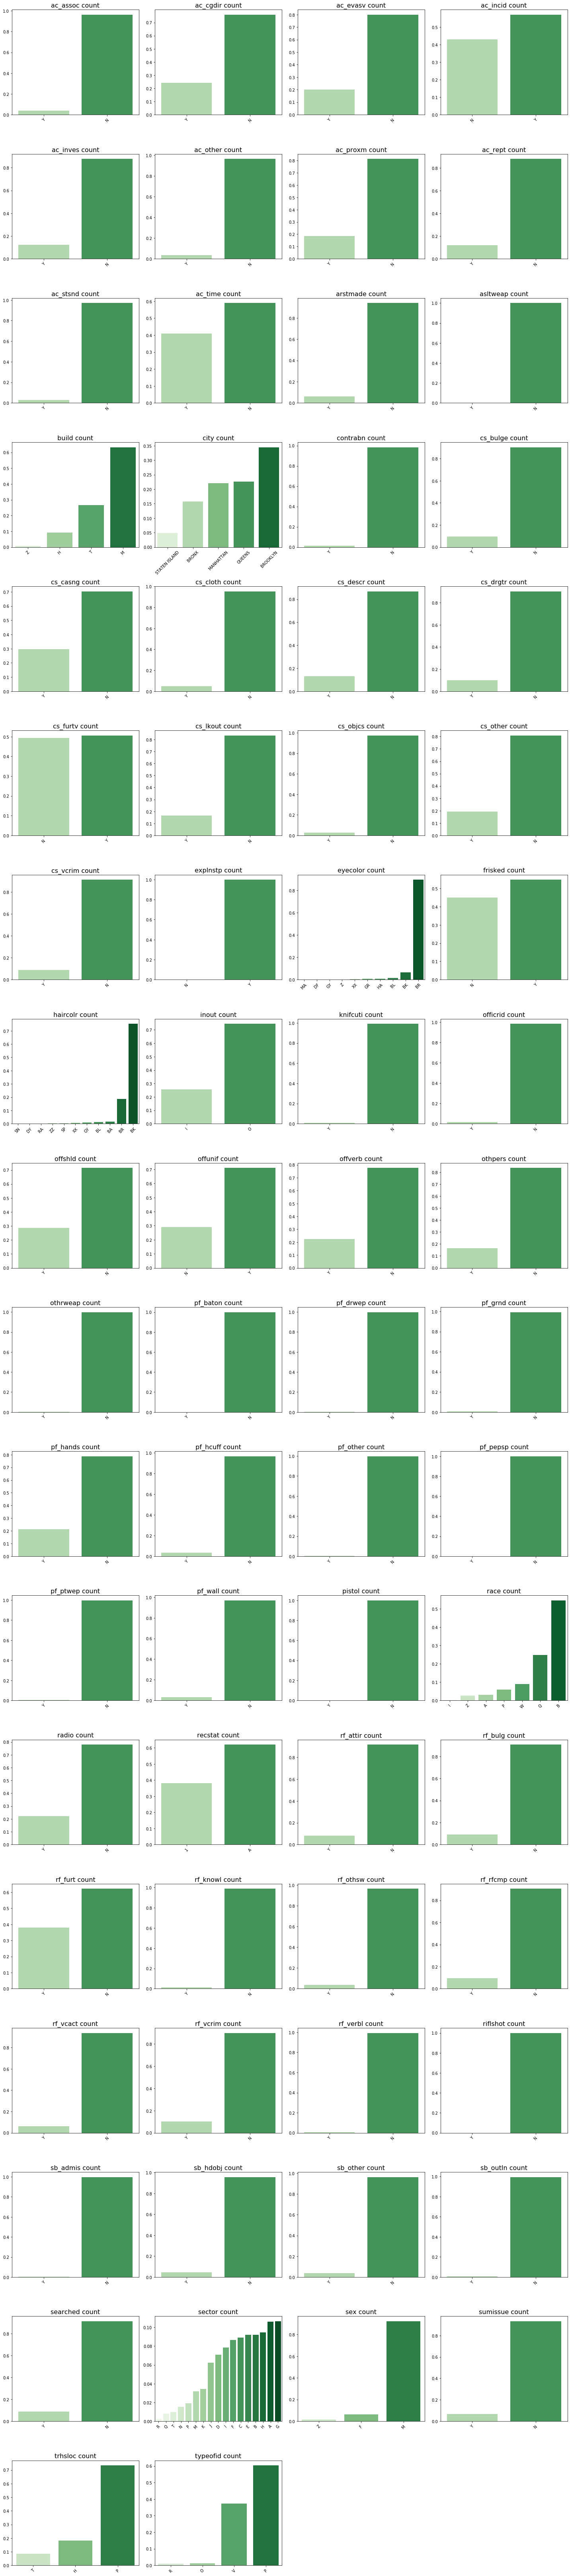

In [5]:
get_graph(df.sort_index(axis="index"))

### Análisis bivariado

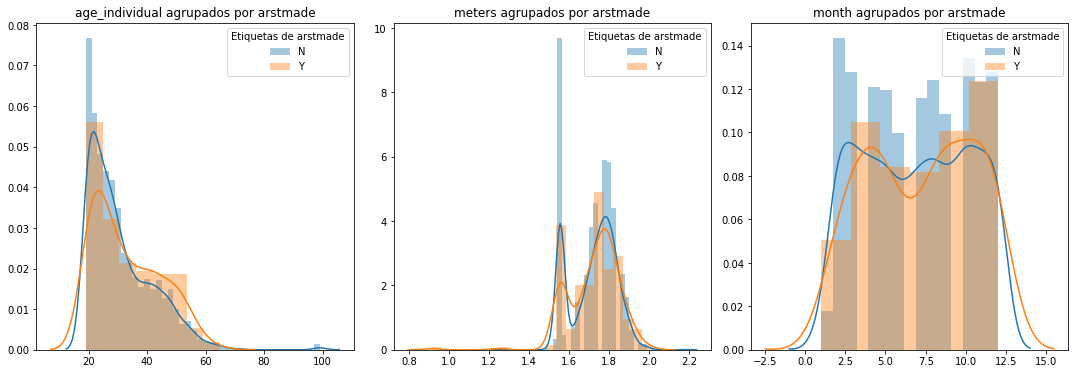

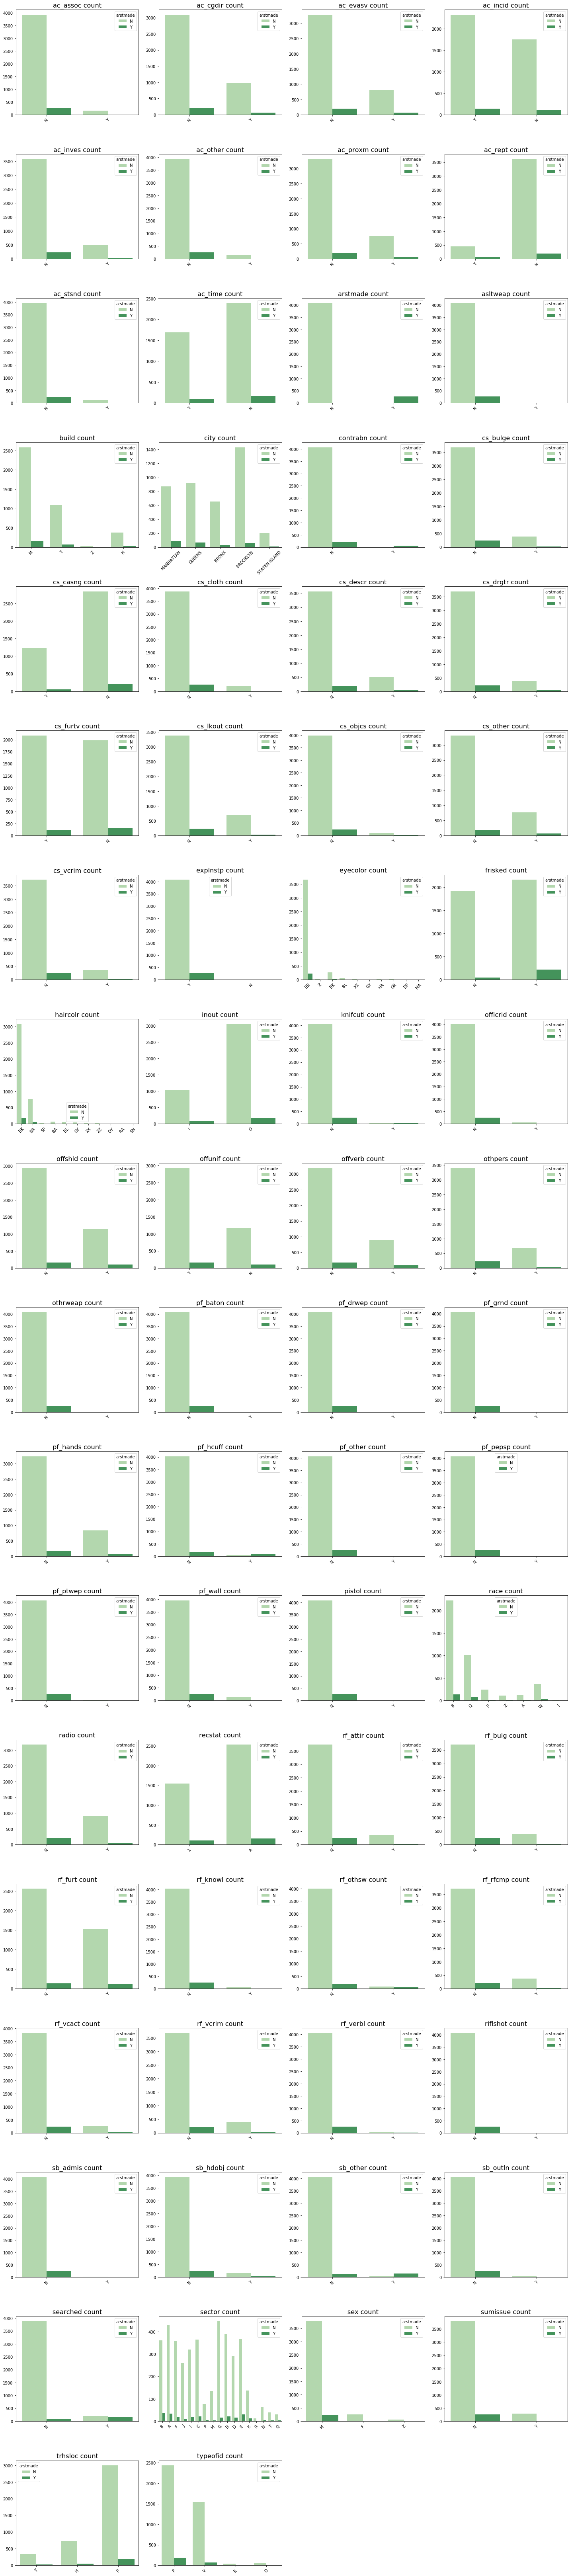

In [6]:
get_graph_2D(df.sort_index(axis="index"), "arstmade")

## Featuring engineering

Se realiza un procesamiento inicial de las variables que consiste en:
- Eliminar valores nulos con dropna().
- Eliminar las columnas con un único valor, por ejemplo se eliminó la columna año.
- Eliminar las columnas categóricas con muchos valores únicos, por ejemplo se eliminó el número de calle.
- Se codificaron las columnas officrid, offshld, sector, trhsloc, beat y offverb. Por lo tanto, la nueva descripción de las columnas es:
    - "officrid": ID CARD PROVIDED BY OFFICER? (Y: IF NOT IN UNIFORM, N)
    - "offshld": SHIELD PROVIDED BY OFFICER? (Y: IF NOT IN UNIFORM, N)
    - "sector": LOCATION OF STOP SECTOR (U FOR UNKNOWN)
    - "trhsloc": WAS LOCATION HOUSING OR TRANSIT AUTHORITY ? (U FOR UNKNOWN)
    - "beat": LOCATION OF STOP BEAT (U for UNKNOWN)
    - "offverb": VERBAL STATEMENT PROVIDED BY OFFICER (IF NOT IN UNIFORM)?
- Se agrega columna "meters" con altura del sospechoso en metros.
- Se agrega columna de "month" con el mes en que ocurrió el procedimiento.
- Se crea columna "age_individual" con la edad del sospechoso.

Se reducen las columnas a 75 y 4636 observaciones.

In [11]:
return
# Importa base de datos original y aplica procesamiento inicial

df = pd.read_csv("2009_1perc.csv", index_col=0)
display(Markdown("**Base de datos original**: Tiene {} columnas y {} ".format(df.shape[1], df.shape[0])))

df, _, _ = create_suitable_dataframe(df)
display(Markdown("**Base de datos procesada**: Tiene {} columnas y {} ".format(df.shape[1], df.shape[0])))

# Importa descripción de variables
df_spec = pd.read_csv("2009 SQF File Spec.csv", sep=";")
df_spec.set_index("Variable", inplace=True)

# Mantiene solo columnas en el nuevo dataframe y modifica/agrega descripciones
df_desc = df_spec[df_spec.index.isin(df.columns)]

df_desc.loc["officrid",["Label"]] = "ID CARD PROVIDED BY OFFICER? (Y: IF NOT IN UNIFORM, N)"
df_desc.loc["offshld",["Label"]] = "SHIELD PROVIDED BY OFFICER? (Y: IF NOT IN UNIFORM, N)"
df_desc.loc["sector",["Label"]] = "LOCATION OF STOP SECTOR (U FOR UNKNOWN)"
df_desc.loc["trhsloc",["Label"]] = "WAS LOCATION HOUSING OR TRANSIT AUTHORITY ? (U FOR UNKNOWN)"
df_desc.loc["beat",["Label"]] = "LOCATION OF STOP BEAT (U for UNKNOWN)"
df_desc.loc["offverb",["Label"]] = "VERBAL STATEMENT PROVIDED BY OFFICER (IF NOT IN UNIFORM)?"
df_desc.loc["meters",["Label"]] = "SUSPECT'S HEIGHT"
df_desc.loc["month",["Label"]] = "MONTH"
df_desc.loc["age_individual",["Label"]] = "SUSPECT'S AGE"


df_desc.loc[:, ["Label"]].head(df_desc.shape[0]).sort_index(axis="index")


SyntaxError: 'return' outside function (<ipython-input-11-f07079f2de53>, line 1)